In [23]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt

from constants import PATH # path & others constants definition

# Load the consolidated dataset
consolidated_file_path = f'{PATH}consolidated_ironhack_data.csv'
consolidated_df = pd.read_csv(consolidated_file_path)
print(consolidated_df.head(3))

   fee_id  cash_request_id             type    status               category  \
0    6537          14941.0  instant_payment  rejected                    NaN   
1    6961          11714.0         incident  accepted  rejected_direct_debit   
2   16296          23371.0  instant_payment  accepted                    NaN   

   total_amount                              reason  \
0           5.0  Instant Payment Cash Request 14941   
1           5.0               rejected direct debit   
2           5.0  Instant Payment Cash Request 23371   

                  fee_created_at                     updated_at  \
0   2020-09-07 10:47:27.42315+00  2020-10-13 14:25:09.396112+00   
1  2020-09-09 20:51:17.998653+00  2020-10-13 14:25:15.537063+00   
2  2020-10-23 10:10:58.352972+00  2020-10-23 10:10:58.352994+00   

                        paid_at from_date to_date charge_moment     id_y  \
0  2020-12-17 14:50:07.47011+00       NaN     NaN         after  14941.0   
1  2020-12-08 17:13:10.45908+00      

In [29]:
# 1. Descriptive Statistics for 'amount' and 'total_amount'
print("\nDescriptive Statistics for Consolidated Data:")
print(consolidated_df[['cash_request_amount', 'total_amount']].describe())

# Check for potential outliers in 'amount'
outliers = consolidated_df[consolidated_df['cash_request_amount'] > consolidated_df['cash_request_amount'].quantile(0.99)]
print(f"\nPotential Outliers (Top 1% of Cash Request Amounts): {len(outliers)} records")


Descriptive Statistics for Consolidated Data:
       cash_request_amount  total_amount
count         21057.000000  21057.000000
mean             81.833547      5.000237
std              26.945058      0.034457
min               1.000000      5.000000
25%              50.000000      5.000000
50%             100.000000      5.000000
75%             100.000000      5.000000
max             200.000000     10.000000

Potential Outliers (Top 1% of Cash Request Amounts): 4 records


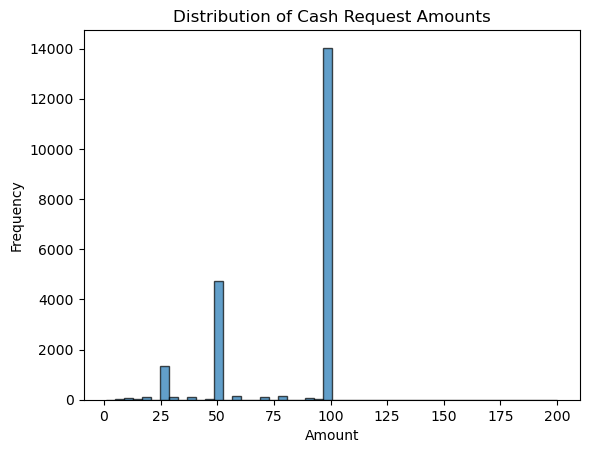

In [33]:
# 2. Visualization: Distribution of Cash Request Amounts
plt.hist(consolidated_df['cash_request_amount'].dropna(), bins=50, edgecolor='k', alpha=0.7)
plt.title('Distribution of Cash Request Amounts')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()

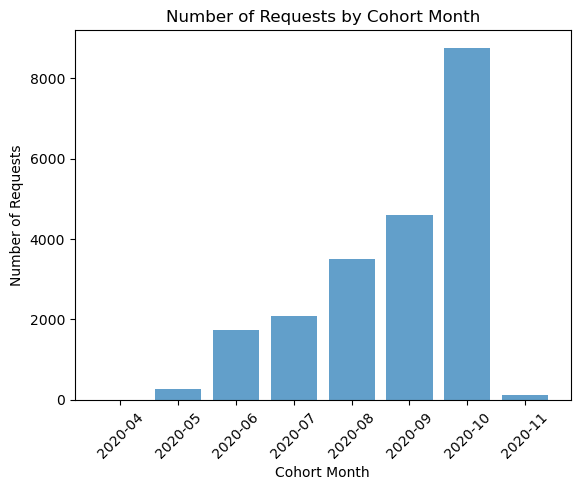

In [35]:
# 3. Visualization: Requests by Cohort Month
# Convert cohort_month to string for visualization
consolidated_df['cohort_month'] = consolidated_df['cohort_month'].astype(str)
cohort_counts = consolidated_df['cohort_month'].value_counts().sort_index()
plt.bar(cohort_counts.index, cohort_counts.values, alpha=0.7)
plt.title('Number of Requests by Cohort Month')
plt.xlabel('Cohort Month')
plt.ylabel('Number of Requests')
plt.xticks(rotation=45)
plt.show()

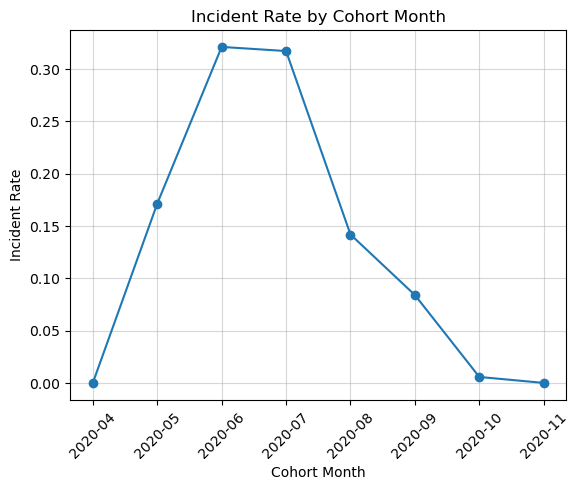

In [37]:
# 4. Incident Rate Analysis
# Filter dataset for incidents
incident_data = consolidated_df[consolidated_df['type'] == 'incident']
incident_counts_by_cohort = incident_data['cohort_month'].value_counts().sort_index()
cohort_counts = cohort_counts.sort_index()  # Ensure both series are aligned
incident_rate_by_cohort = (incident_counts_by_cohort / cohort_counts).fillna(0)

plt.plot(incident_rate_by_cohort.index, incident_rate_by_cohort.values, marker='o')
plt.title('Incident Rate by Cohort Month')
plt.xlabel('Cohort Month')
plt.ylabel('Incident Rate')
plt.xticks(rotation=45)
plt.grid(alpha=0.5)
plt.show()